In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels as sm
import seaborn as sns

pd.set_option("display.max_columns", 1000)
sns.set_style('darkgrid')
sns.set_palette('colorblind')
plt.figure(figsize = (10,7))
sns.set(rc={'figure.figsize':(10,7)})
sns.set(style="ticks", color_codes=True)

<Figure size 720x504 with 0 Axes>

In [36]:
def reduce_mem_usage(df, verbose=True):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
    col_type = df[col].dtypes
    if col_type in numerics:
      c_min = df[col].min()
      c_max = df[col].max()
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          df[col] = df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          df[col] = df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          df[col] = df[col].astype(np.int64)
      else:
        if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
          df[col] = df[col].astype(np.float16)
        elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
          df[col] = df[col].astype(np.float32)
        else:
          df[col] = df[col].astype(np.float64)

  end_mem = df.memory_usage().sum() / 1024**2
  print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
  print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

  return df

In [52]:
data = pd.read_csv("data.csv", sep=",")
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [53]:
# data.to_csv("data.csv", sep=",", index=False)
data= data.drop(["Photo","Flag","Club Logo", "Loaned From"], axis=1)
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Real Face                   18159 non-null object
Position                    18147 non-nul

Before pre-processing, there are a total of:

* 44 cts Variable

* 45 categorical variables

In [126]:
len(data)

18207

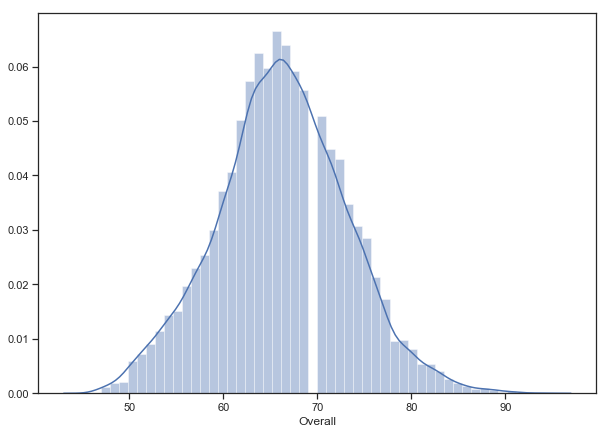

In [83]:
sns.distplot(data["Overall"])

# Missing Values

In [64]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing (%)': percent_missing})
missing_value_df.sort_values('percent_missing (%)', inplace=True, ascending=False)
missing_value_df.head(50)

,column_name,percent_missing (%)
RDM,RDM,11.451639
LW,LW,11.451639
ST,ST,11.451639
LS,LS,11.451639
LF,LF,11.451639
CF,CF,11.451639
RF,RF,11.451639
RW,RW,11.451639
LAM,LAM,11.451639
CAM,CAM,11.451639


In [127]:
investigate_0 = data[["Value","Wage","Release Clause"]]
len(investigate_0[investigate_0["Release Clause"].isnull()])

1564

In [83]:
# ax = sns.barplot(x="percent_missing (%)", y="column_name", 
#                  data=missing_value_df)

In [55]:
monetary_col = ["Value","Wage","Release Clause"]

for col in monetary_col:
    if col != "Release Clause":
        data[col] = data[col].apply(lambda x: 
                                    float(x.replace("€", "").replace("M", ""))*1000000 if "M" in x
                                    else float(x.replace("€", "").replace("K", ""))*1000)      
    else:        
        data[col] = data[col].fillna("-0.001K").apply(lambda x: 
                                    float(x.replace("€", "").replace("M", ""))*1000000 if "M" in x
                                    else float(x.replace("€", "").replace("K", ""))*1000)

In [5]:
data.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,1.820700e+04
mean,214298.338606,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,4.191200e+06
std,29965.244204,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,1.070778e+07
min,16.000000,16.000000,46.000000,48.000000,0.000000e+00,0.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
25%,200315.500000,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,3.920000e+05
50%,221759.000000,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.000000e+06
75%,236529.500000,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,3.000000e+06
max,246620.000000,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,2346.000000,5.000000,5.000000,5.00

In [56]:
# after transform
investigate_0 = data[["Value","Wage","Release Clause"]]
len(investigate_0[investigate_0["Release Clause"] == -1]) # 1564

1564

In [57]:
investigate_0[investigate_0["Release Clause"] == -1].head(10)

,Value,Wage,Release Clause
28,69500000.0,315000.0,-1.0
38,57000000.0,245000.0,-1.0
91,37000000.0,235000.0,-1.0
166,36500000.0,18000.0,-1.0
176,35000000.0,165000.0,-1.0
332,22500000.0,57000.0,-1.0
354,18000000.0,57000.0,-1.0
357,21000000.0,48000.0,-1.0
427,20000000.0,72000.0,-1.0
434,17000000.0,85000.0,-1.0


In [138]:
investigate_0.head(10)

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0
5,93000000.0,340000.0,172100000.0
6,67000000.0,420000.0,137400000.0
7,80000000.0,455000.0,164000000.0
8,51000000.0,380000.0,104600000.0
9,68000000.0,94000.0,144500000.0


In [141]:
investigate_1 = investigate_0[investigate_0["Release Clause"] != 1.0]
investigate_1["Clause_To_Val"] = investigate_1["Release Clause"]/investigate_1["Value"]
investigate_1.describe()

/Users/hq2nguye/anaconda3/envs/Elo2018/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Value,Wage,Release Clause,Clause_To_Val
count,1.664300e+04,16643.000000,1.664300e+04,16643.000000
mean,2.442667e+06,9618.037613,4.585061e+06,1.799848
std,5.720629e+06,22263.518927,1.111872e+07,0.339705
min,1.000000e+04,1000.000000,1.300000e+04,0.990909
25%,3.000000e+05,1000.000000,5.250000e+05,1.538462
50%,6.750000e+05,3000.000000,1.100000e+06,1.755556
75%,2.000000e+06,8000.000000,3.500000e+06,2.000000
max,1.185000e+08,565000.000000,2.281000e+08,4.358333


In [142]:
investigate_1["Clause_To_Val"].median()

1.7555555555555555

In [143]:
investigate_1["Clause_To_Val"].mean()

1.7998484115466489

In [151]:
df = investigate_1.groupby('Clause_To_Val')["Value"].nunique().sort_values(ascending=False)
print(df.head(10)) # Dropped this as well

Clause_To_Val
2.0    91
1.6    61
1.5    60
2.2    60
1.7    59
1.9    55
1.8    51
2.1    47
1.4    42
2.4    40
Name: Value, dtype: int64


In [152]:
investigate_1[investigate_1["Clause_To_Val"] == 2.0].head(10)
# Note that the Value here are smaller than of those with clause to val >1.7 <1.8

,Value,Wage,Release Clause,Clause_To_Val
94,39000000.0,28000.0,78000000.0,2.0
145,16500000.0,25000.0,33000000.0,2.0
175,20000000.0,22000.0,40000000.0,2.0
194,25500000.0,22000.0,51000000.0,2.0
204,26000000.0,26000.0,52000000.0,2.0
299,17000000.0,18000.0,34000000.0,2.0
308,12500000.0,17000.0,25000000.0,2.0
310,12500000.0,15000.0,25000000.0,2.0
318,1500000.0,10000.0,3000000.0,2.0
375,18500000.0,19000.0,37000000.0,2.0


In [165]:
investigate_1[(investigate_1["Clause_To_Val"] >= 1.7) & 
              (investigate_1["Clause_To_Val"] <= 1.8)]["Value"].mean()/1000000

3.218618873110399

In [162]:
investigate_1[(investigate_1["Clause_To_Val"] >= 2)]["Value"].mean()/1000000

3.00163527586971

## Question?
Should we just consider replacing Clause by the Clause_To_Val ratio... this would make fillna with mean/median a lot ezier

In [65]:
# for now replace missing clause_to_val ratio by the mean
data["clause_to_val"] = (data["Release Clause"]/data["Value"]) #.replace(0.0, 1.799848)

In [66]:
data["clause_to_val"] = data["clause_to_val"].apply(lambda x: 1.799848 if "-" in str(x) else x)

In [87]:
len(data[data["clause_to_val"] == 1.799848]) # 1564 matching with b4 good!

1564

## Next transfrom height and weight to numerical

In [86]:
data["Height"] = data["Height"].apply(lambda x: float(str(x).replace("\'", ".")))
data["Weight"] = data["Weight"].apply(lambda x: float(str(x).replace("lbs", "")))

In [112]:
data["Height"].fillna(data["Height"].mean(), inplace = True)
data["Weight"].fillna(data["Weight"].mean(), inplace = True)

## transform missing attributes for goalies

In [101]:
att_col = ['LS', 'ST', 'RS', 'LW','LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
           'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

data[att_col] = data[att_col].fillna("1+0") # These guys are all goalies
# replace nan with 1, 0 sometimes gives optimization troubles (0 division, etc)

In [108]:
def helper_att_col(val):
    x, y = str(val).split("+")
    return float(x) + float(y)

In [109]:
for col in att_col:
    data[col] = data[col].apply(helper_att_col)

In [117]:
att_col2 = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [118]:
for col in att_col2:
    data[col].fillna(data[col].mean(), inplace = True)

## Lets check where we are at

In [121]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing (%)': percent_missing})
missing_value_df.sort_values('percent_missing (%)', inplace=True, ascending=False)
missing_value_df[missing_value_df["percent_missing (%)"] != 0]

,column_name,percent_missing (%)
Joined,Joined,8.529686
Contract Valid Until,Contract Valid Until,1.587302
Club,Club,1.323667
Jersey Number,Jersey Number,0.329544
Position,Position,0.329544
Real Face,Real Face,0.263635
Work Rate,Work Rate,0.263635
Skill Moves,Skill Moves,0.263635
Weak Foot,Weak Foot,0.263635
International Reputation,International Reputation,0.263635


Okay it looks much better now

In [128]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,clause_to_val
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5.70,159.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.049774
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6.20,183.0,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,1.650649
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5.90,150.0,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,1.924895
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6.40,168.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1.925000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5.11,154.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,1.925490


In [153]:
# skill moves
data["Skill Moves"].mode()

0    2.0
dtype: float64

In [155]:
data["Skill Moves"].fillna(data["Skill Moves"].mode(), inplace = True)

In [152]:
df = data.groupby('Skill Moves')['ID'].nunique().sort_values(ascending=False)
print(df.head(10))

Skill Moves
2.0    8565
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: ID, dtype: int64


In [131]:
# Joined
data["Joined"].describe()

count           16654
unique           1736
top       Jul 1, 2018
freq             1538
Name: Joined, dtype: object

In [157]:
data["Joined"].fillna(data["Joined"].mode(), inplace = True)

In [132]:
# Contract Valid Until
data["Contract Valid Until"].describe()

count     17918
unique       36
top        2019
freq       4819
Name: Contract Valid Until, dtype: object

In [159]:
data["Contract Valid Until"].fillna(data["Contract Valid Until"].mode(), inplace = True)

In [133]:
# Club
data["Club"].describe()

count            17966
unique             651
top       Cardiff City
freq                33
Name: Club, dtype: object

In [160]:
data["Club"].fillna(data["Club"].mode(), inplace = True)

In [135]:
# Jersey Number
data["Jersey Number"].mode()

0    8.0
dtype: float64

In [149]:
df = data.groupby('Jersey Number')['ID'].nunique().sort_values(ascending=False)
print(df.head(10))

Jersey Number
8.0     612
7.0     604
10.0    593
11.0    590
6.0     586
5.0     579
9.0     577
4.0     573
20.0    568
1.0     566
Name: ID, dtype: int64


In [161]:
data["Jersey Number"].fillna(data["Jersey Number"].mode(), inplace = True)

In [137]:
# Position
data["Position"].describe()

count     18147
unique       27
top          ST
freq       2152
Name: Position, dtype: object

In [162]:
df = data.groupby('Position')['ID'].nunique().sort_values(ascending=False)
print(df.head())

Position
ST    2152
GK    2025
CB    1778
CM    1394
LB    1322
Name: ID, dtype: int64


In [163]:
data["Position"].fillna(data["Position"].mode(), inplace = True)

In [164]:
# Drop real face (binary y or n)
del data["Real Face"]

In [144]:
# Body Type
data["Body Type"].describe()

count      18159
unique        10
top       Normal
freq       10595
Name: Body Type, dtype: object

In [146]:
df = data.groupby('Body Type')['ID'].nunique().sort_values(ascending=False)
print(df)

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Shaqiri                    1
PLAYER_BODY_TYPE_25        1
Neymar                     1
Messi                      1
Courtois                   1
C. Ronaldo                 1
Akinfenwa                  1
Name: ID, dtype: int64


In [173]:
data["Body Type"].fillna(data["Body Type"].mode(), inplace = True)

In [165]:
# Work Rate
df = data.groupby('Work Rate')['ID'].nunique().sort_values(ascending=False)
print(df)

Work Rate
Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: ID, dtype: int64


In [174]:
data["Work Rate"].fillna(data["Work Rate"].mode(), inplace = True)

In [166]:
# Weak Foot
df = data.groupby('Weak Foot')['ID'].nunique().sort_values(ascending=False)
print(df) # 5 is the highest

Weak Foot
3.0    11349
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: ID, dtype: int64


In [175]:
data["Weak Foot"].fillna(data["Weak Foot"].mode(), inplace = True)

In [167]:
# International Reputation
df = data.groupby('International Reputation')['ID'].nunique().sort_values(ascending=False)
print(df)
# Okay so 5 is the highest

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: ID, dtype: int64


In [176]:
data["International Reputation"].fillna(data["International Reputation"].mode(), inplace = True)

In [172]:
# Preferred Foot
df = data.groupby('Preferred Foot')['ID'].nunique().sort_values(ascending=False)
print(df)

Preferred Foot
Right    13948
Left      4211
Name: ID, dtype: int64


In [177]:
data["Preferred Foot"].fillna(data["Preferred Foot"].mode(), inplace = True)

### NOTE: considering ranking some of these categorical vars

In [178]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing (%)': percent_missing})
missing_value_df.sort_values('percent_missing (%)', inplace=True, ascending=False)
missing_value_df[missing_value_df["percent_missing (%)"] != 0]

,column_name,percent_missing (%)
Joined,Joined,8.529686
Contract Valid Until,Contract Valid Until,1.587302
Club,Club,1.323667
Jersey Number,Jersey Number,0.329544
Position,Position,0.329544
Preferred Foot,Preferred Foot,0.263635
Body Type,Body Type,0.263635
Skill Moves,Skill Moves,0.263635
Weak Foot,Weak Foot,0.263635
International Reputation,International Reputation,0.263635


In [179]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,clause_to_val
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5.70,159.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.049774
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6.20,183.0,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,1.650649
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5.90,150.0,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,1.924895
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6.40,168.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1.925000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5.11,154.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,1.925490


In [181]:
data = reduce_mem_usage(data)

Memory usage after optimization is: 3.94 MB
Decreased by 0.0%
